QTM 350 Final Project Data Visualizations

Katherine Martini

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('final-project-data.csv', encoding='cp1252')

In [3]:
region_mapping = {
    'Argentina': 'South America',
    'Belize': 'Central America',
    'Costa Rica': 'Central America',
    'El Salvador': 'Central America',
    'Guatemala': 'Central America',
    'Honduras': 'Central America',
    'Nicaragua': 'Central America',
    'Panama': 'Central America',
    'Mexico': 'Central America',
    'Bolivia': 'South America',
    'Brazil': 'South America',
    'Chile': 'South America',
    'Colombia': 'South America',
    'Ecuador': 'South America',
    'Guyana': 'South America',
    'Paraguay': 'South America',
    'Peru': 'South America',
    'Suriname': 'South America',
    'Uruguay': 'South America',
    'Venezuela, RB': 'South America',
    'Cuba': 'Caribbean',
    'Dominican Republic': 'Caribbean',
    'Haiti': 'Caribbean',
    'Jamaica': 'Caribbean',
    'St. Martin (French part)': 'Caribbean',
    'Puerto Rico': 'Caribbean',
}

df['Region'] = df['Country Name'].map(region_mapping)

In order to do analysis on the data and comparing the countries within these regions to one another, need to modify the dataframes previously created. This will help in making visualizations easier. 

In [4]:
#Life expectancy
life_expectancy_df = df[df['Series Name'] == 'Life expectancy at birth, total (years)'].copy()
year_columns = [col for col in df.columns if '[YR' in col]
life_expectancy_df.loc[:, year_columns] = life_expectancy_df[year_columns].apply(pd.to_numeric, errors='coerce')
life_result = life_expectancy_df.groupby(['Country Name', 'Region'])[year_columns].mean().reset_index()
life_result['Average Life Expectancy'] = life_result[year_columns].mean(axis=1)
life_result = life_result[['Region', 'Country Name', 'Average Life Expectancy']]

#Mortality Rate
mortality_df = df[df['Series Name'] == 'Mortality rate, under-5 (per 1,000 live births)'].copy()
mortality_df.loc[:, year_columns] = mortality_df[year_columns].apply(pd.to_numeric, errors='coerce')
mort_result = mortality_df.groupby(['Country Name', 'Region'])[year_columns].mean().reset_index()
mort_result['Average Mortality Under 5 yo'] = mort_result[year_columns].mean(axis=1)
mort_result = mort_result[['Region', 'Country Name', 'Average Mortality Under 5 yo']]

#Fertility Rate
fertility_df = df[df['Series Name'] == 'Adolescent fertility rate (births per 1,000 women ages 15-19)'].copy()
fertility_df.loc[:, year_columns] = fertility_df[year_columns].apply(pd.to_numeric, errors='coerce')
fertility_result = fertility_df.groupby(['Country Name', 'Region'])[year_columns].mean().reset_index()
fertility_result['Average Fertility Rate'] = fertility_result[year_columns].mean(axis=1)
fertility_result = fertility_result[['Region', 'Country Name', 'Average Fertility Rate']]

#merge the dfs
combined = life_result.merge(mort_result, on=['Country Name', 'Region'])
combined = combined.merge(fertility_result, on=['Country Name', 'Region'])



adding additional two dataframes to work with:

In [5]:
immunization_group = [
    'Immunization, DPT (% of children ages 12-23 months)',
    'Immunization, HepB3 (% of one-year-old children)',
    'Immunization, measles (% of children ages 12-23 months)'
]
immunization_df = df[df['Series Name'].isin(immunization_group)].copy()
immunization_df.loc[:, year_columns] = immunization_df[year_columns].apply(pd.to_numeric, errors='coerce')
immune_result = immunization_df.groupby(['Country Name', 'Region'])[year_columns].mean().reset_index()
immune_result['Grouped Immunization Average'] = immune_result[year_columns].mean(axis=1)
immune_result = immune_result[['Region', 'Country Name', 'Grouped Immunization Average']]

health_df = df[df['Series Name'] == 'Current health expenditure (% of GDP)'].copy()
health_df.loc[:, year_columns] = health_df[year_columns].apply(pd.to_numeric, errors='coerce')
health_result = health_df.groupby(['Country Name', 'Region'])[year_columns].mean().reset_index()
health_result['Average Health Expenditure'] = health_result[year_columns].mean(axis=1)
health_result = health_result[['Region', 'Country Name', 'Average Health Expenditure']]

Text(120.72222222222221, 0.5, 'Country')

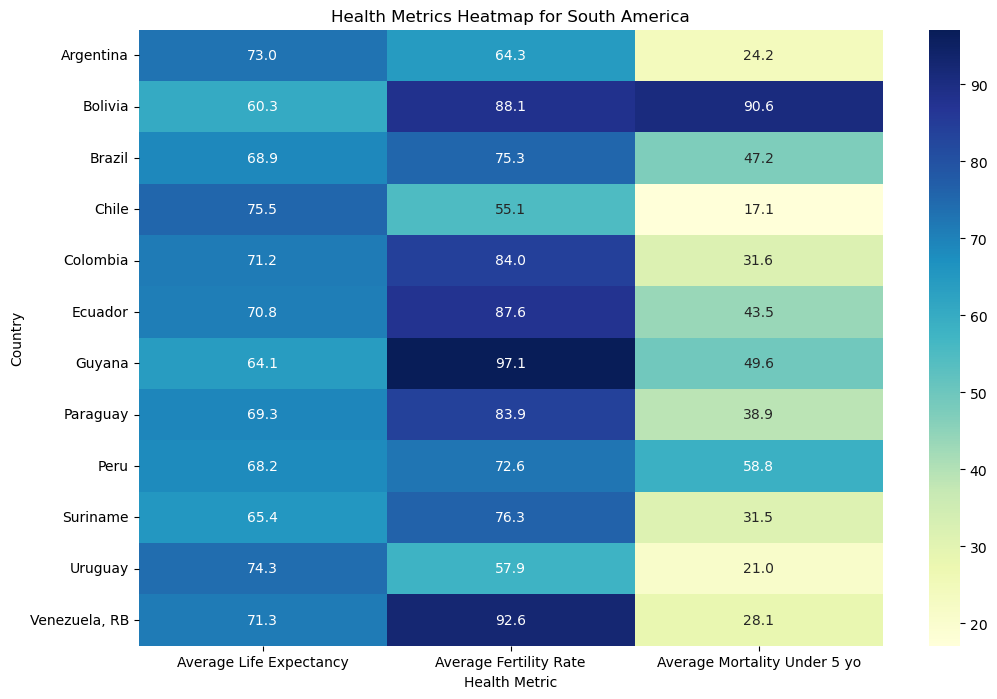

In [6]:
south_america_df = combined[combined['Region'] == 'South America']

heatmap = south_america_df[['Country Name', 
                            'Average Life Expectancy', 
                            'Average Fertility Rate', 
                            'Average Mortality Under 5 yo']]

heatmap = heatmap.set_index('Country Name')
heatmap = heatmap.apply(pd.to_numeric, errors='coerce')



plt.figure(figsize=(12, 8))
sns.heatmap(heatmap, annot=True, cmap="YlGnBu", fmt=".1f")
plt.title('Health Metrics Heatmap for South America')
plt.xlabel('Health Metric')
plt.ylabel('Country')

Do the same for Central America:

Text(120.72222222222221, 0.5, 'Country')

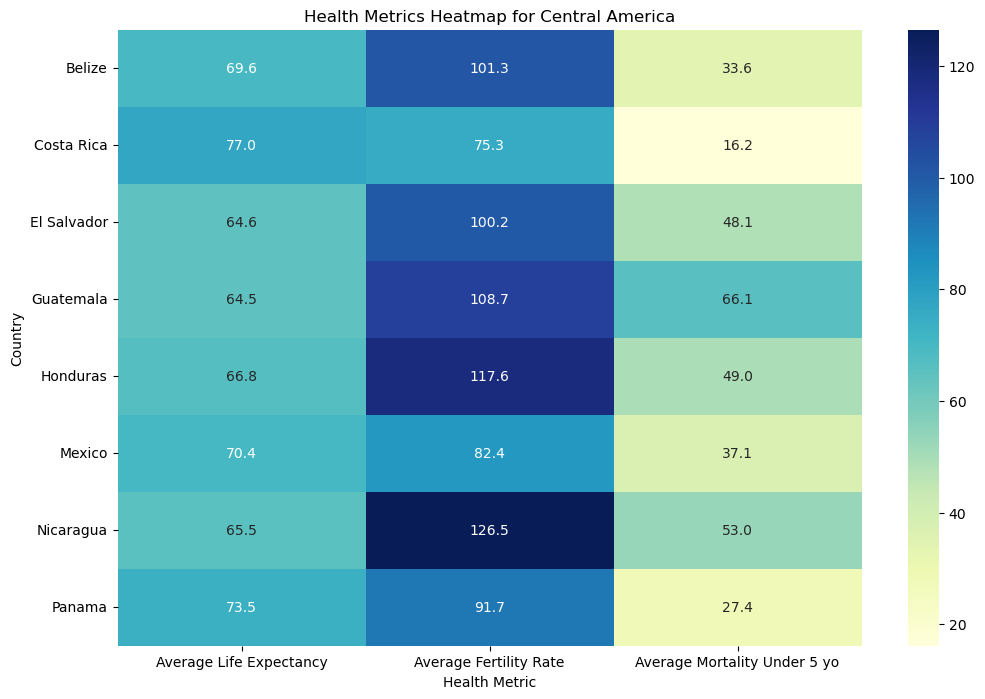

In [7]:
central_america_df = combined[combined['Region'] == 'Central America']

heatmap = central_america_df[['Country Name', 
                            'Average Life Expectancy', 
                            'Average Fertility Rate', 
                            'Average Mortality Under 5 yo']]

heatmap = heatmap.set_index('Country Name')
heatmap = heatmap.apply(pd.to_numeric, errors='coerce')



plt.figure(figsize=(12, 8))
sns.heatmap(heatmap, annot=True, cmap="YlGnBu", fmt=".1f")
plt.title('Health Metrics Heatmap for Central America')
plt.xlabel('Health Metric')
plt.ylabel('Country')

Dropping NA values in the dataframe

In [10]:
fertility_result = fertility_result.dropna(subset=['Average Fertility Rate'])
immune_result = immune_result.dropna(subset=['Grouped Immunization Average'])
life_result = life_result.dropna(subset=['Average Life Expectancy'])
mort_result = mort_result.dropna(subset=['Average Mortality Under 5 yo'])
health_result = health_result.dropna(subset=['Average Health Expenditure'])

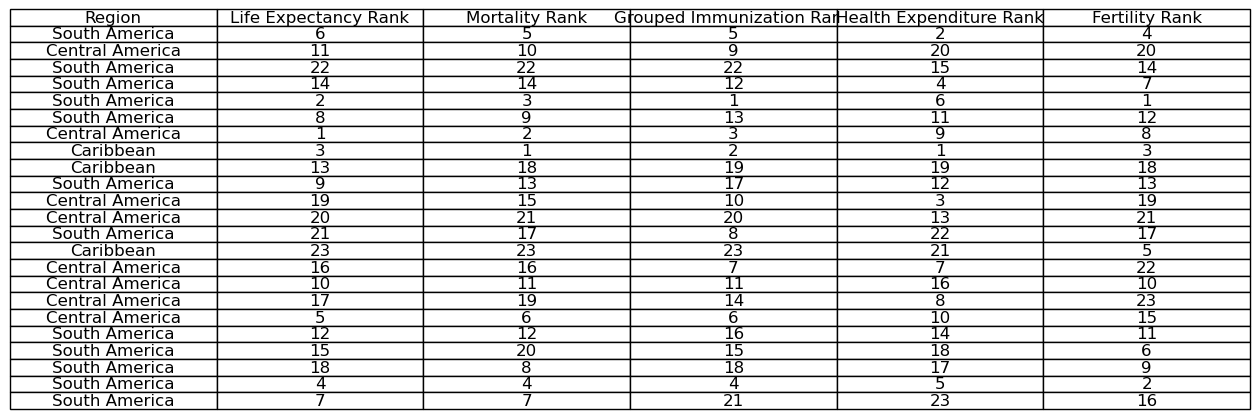

In [16]:
ranking_merge = life_result.merge(mort_result, on=['Region','Country Name'])
ranking_merge = ranking_merge.merge(fertility_result, on=['Region','Country Name'])
ranking_merge = ranking_merge.merge(immune_result, on=['Region','Country Name'])
ranking_merge = ranking_merge.merge(health_result, on=['Region','Country Name'])

ranking_merge['Life Expectancy Rank'] = ranking_merge['Average Life Expectancy'].rank(ascending=False).astype(int)
ranking_merge['Mortality Rank'] = ranking_merge['Average Mortality Under 5 yo'].rank(ascending=True).astype(int)
ranking_merge['Grouped Immunization Rank'] = ranking_merge['Grouped Immunization Average'].rank(ascending=False).astype(int)
ranking_merge['Health Expenditure Rank'] = ranking_merge['Average Health Expenditure'].rank(ascending=False).astype(int)
ranking_merge['Fertility Rank'] = ranking_merge['Average Fertility Rate'].rank(ascending=True).astype(int)

ranking_result = ranking_merge[['Region', 
                            'Life Expectancy Rank', 
                            'Mortality Rank', 
                            'Grouped Immunization Rank', 
                            'Health Expenditure Rank', 
                            'Fertility Rank']]

fig, ax = plt.subplots(figsize=(16, 4))  #
ax.axis('off')

table = ax.table(
    cellText=ranking_result.values,
    colLabels=ranking_result.columns,
    cellLoc='center',
    loc='center'
)

table.auto_set_font_size(False)
table.set_fontsize(12)
plt.savefig('health_region_ranking.png', bbox_inches='tight', dpi=150)
